Note: you may need to restart the kernel to use updated packages.


<Figure size 640x480 with 0 Axes>

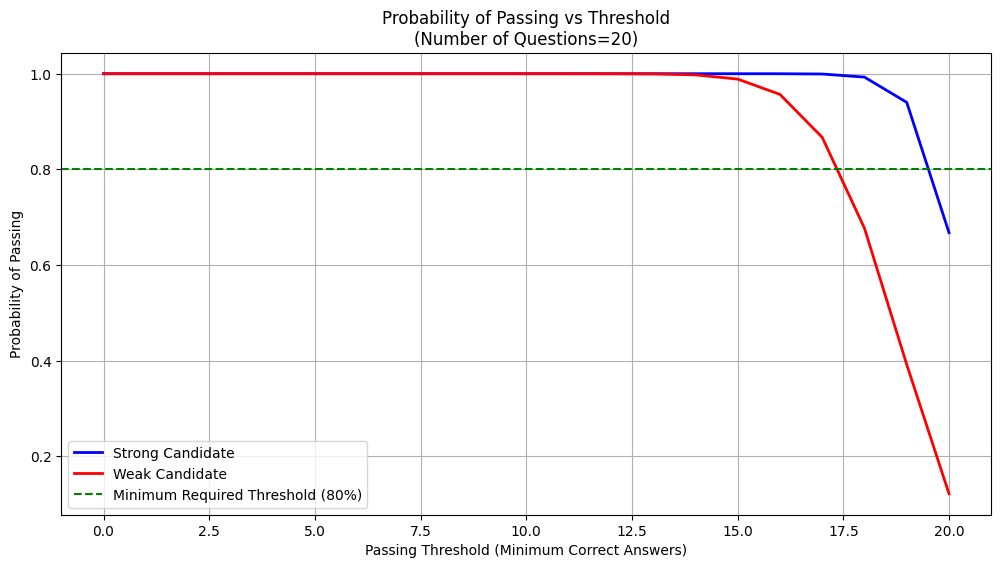

<Figure size 640x480 with 0 Axes>

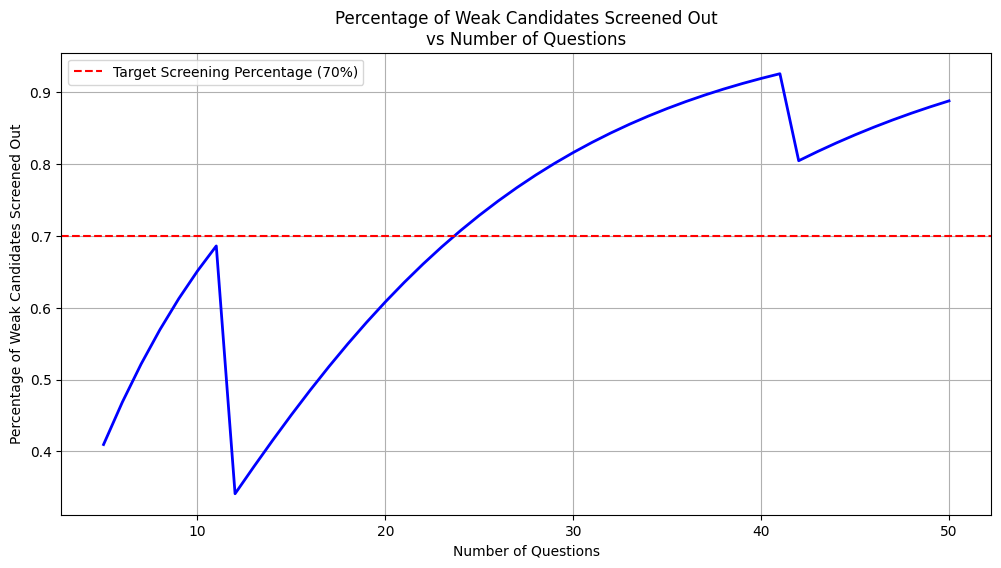

In [2]:
%pip install numpy matplotlib seaborn scipy pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom
import pandas as pd

def calculate_pass_probability(n_questions, threshold, p_correct):
    prob = 1 - sum(binom.pmf(k, n_questions, p_correct) 
                   for k in range(threshold))
    return prob

def plot_threshold_analysis(n_questions=20):
    p_strong = 0.98
    p_weak = 0.90
    
    thresholds = range(n_questions + 1)
    prob_strong = []
    prob_weak = []
    
    for threshold in thresholds:
        prob_strong_candidate = calculate_pass_probability(n_questions, threshold, p_strong)
        prob_weak_candidate = calculate_pass_probability(n_questions, threshold, p_weak)
        prob_strong.append(prob_strong_candidate)
        prob_weak.append(prob_weak_candidate)
    
    plt.figure(figsize=(12, 6))
    plt.plot(thresholds, prob_strong, 'b-', label='Strong Candidate', linewidth=2)
    plt.plot(thresholds, prob_weak, 'r-', label='Weak Candidate', linewidth=2)
    plt.axhline(y=0.8, color='g', linestyle='--', label='Minimum Required Threshold (80%)')
    
    plt.xlabel('Passing Threshold (Minimum Correct Answers)')
    plt.ylabel('Probability of Passing')
    plt.title(f'Probability of Passing vs Threshold\n(Number of Questions={n_questions})')
    plt.grid(True)
    plt.legend()
    return plt

def find_optimal_threshold(n_questions):
    p_strong = 0.98
    p_weak = 0.90
    
    best_threshold = 0
    best_screening = 0
    
    for threshold in range(n_questions + 1):
        prob_strong_candidate = calculate_pass_probability(n_questions, threshold, p_strong)
        prob_weak_candidate = calculate_pass_probability(n_questions, threshold, p_weak)
        
        if prob_strong_candidate >= 0.8:
            screening_weak = 1 - prob_weak_candidate
            if screening_weak > best_screening:
                best_screening = screening_weak
                best_threshold = threshold
    
    return best_threshold, best_screening

def analyze_question_count():
    question_counts = range(5, 51)
    screening_weak = []
    
    for n in question_counts:
        threshold, pct_screened = find_optimal_threshold(n)  
        screening_weak.append(pct_screened)
    
    plt.figure(figsize=(12, 6))
    plt.plot(question_counts, screening_weak, 'b-', linewidth=2)
    plt.axhline(y=0.7, color='r', linestyle='--', label='Target Screening Percentage (70%)')
    
    plt.xlabel('Number of Questions')
    plt.ylabel('Percentage of Weak Candidates Screened Out')
    plt.title('Percentage of Weak Candidates Screened Out\nvs Number of Questions')
    plt.grid(True)
    plt.legend()
    return plt

def analyze_difficulty_levels():
    difficulty_levels = {
        'Easier Than Job': {'strong': 0.99, 'weak': 0.95},
        'Same As Job': {'strong': 0.98, 'weak': 0.90},
        'Harder Than Job': {'strong': 0.70, 'weak': 0.20}  
    }
    
    results = []
    
    for difficulty, probabilities in difficulty_levels.items():
        min_questions = 5
        found = False
        
        while not found and min_questions <= 100:
            threshold, pct_screened = find_optimal_threshold(min_questions)
            prob_strong_candidate = calculate_pass_probability(min_questions, threshold, probabilities['strong']) 
            
            if prob_strong_candidate >= 0.8 and pct_screened >= 0.7:
                found = True
            else:
                min_questions += 1
                
        if found:
            results.append({
                'Difficulty': difficulty, 
                'Number of Questions': min_questions,
                'Threshold': threshold,
                'Probability of Passing (Strong)': prob_strong_candidate,
                'Percentage Screened Out (Weak)': pct_screened
            })
    
    return pd.DataFrame(results)

def main():
    plt.figure(1) 
    plot_threshold_analysis()
    optimal_threshold, pct_screened = find_optimal_threshold(20)
    plt.show()
    
    plt.figure(2)
    analyze_question_count()
    plt.show()
    
    results_df = analyze_difficulty_levels()
    plt.show()

if __name__ == "__main__":
    main()

# PRESENTATION
https://docs.google.com/presentation/d/1S4nyUOdzhWeEk0ZO4Cg1tOEQMChPhFDXjnHyJdyh72g/edit?usp=drive_link